# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement
Foodhub, and online food aggregator in New York City. Foodhub company faces the challanges about demand pattern for various restaurants on it's platform. As  increasing number of restaurents in the city along with increasing number of  students and busy professional who are depends on online food delivery, optimizing what restaurants are offerring and how delivery system is working is crucial. **FoodHub has historical order data  but it requires  clear analytical understanding of this data to make great business decision to imporove customer experience along with business operation**.

### Ojbective:
As a Data Scientist my objective is to analyze FoodHub's historical order data to answer business questions. **My primary goal would be get the insight into the demand across all the restaurnt alinged with FoodHub, which actually help us to improve the customer satisfaction and smoothen the business operation.**



### Data Dictionary

| Column_Name | Description | Data type |
| ------- | -------  | ------- |
| order_id | Unique Identifier for each order | int64|
| customer_id | Unique Identifier for each customer | int64|
| restaurant_name | Name of the restaurant | object|
| cuisine_type | Type of cuisine offered by the restaurnat | object|
| cost_of_the_order | Total Cost of the oder in dollars | float64|
| day_of_the_week | day of the week when the order was placed (e.g.,Weekend, Weekdays) | object|
| rating | Rating given by the customer for the order (Out of 5) | object|
| food_preparation_time | Time taken by the restaurant to prepare the food(in minutes) | int64|
| delivery_time | Time taken by the delivery personto deliver the food(in minutes) | int64|


### Let us start by importing the required libraries

In [79]:
# importing the necessary libraries for the project
import numpy as np                    #for the numerical operation
import pandas as pd                   #for data manupulation
import matplotlib.pyplot as plt       #for plotting
import seaborn as sns                 #for enhanced visualization

### Understanding the structure of the data

In [80]:
# Accessing the google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
# Reading the file foodhub dataset

food_data = pd.read_csv('/content/drive/MyDrive/AIML/AIML_Projects/Python_Project_May_2025/foodhub_order.csv')

In [82]:
# Write your code here to view the first 5 rows
#Showing first 5 records from the dataframe
food_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [83]:
# We can get the rows and columns infomation just by using shape()
food_data.shape

(1898, 9)

#### Observations:
- There are 1898 Rows and 9 columns in the dataset.
- It looks quite enough records for data analysis.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [85]:
#Accessing the data with all columns and it's datatype using info() function

food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- order_id, customer_id, food_preparation_time and delivery_time are `integers` which is unique identifier and time duration.
- restaurant_name, cuisine_type and day_of_the_week are the `object data type` which is appropriate for the categorical data analysis.
- cost_of_the_order is with `float data type` which is appropriate as per the nature of column.
- As inspected rating  column and we have found `['Not given', '5', '3', '4']`  `object` data type because it has non-numeric values `Non given` so we need to address this  numerical operation and further analysis. As per the nature of column it should be `numeric`so that's why we need to address this column for further analysis.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [86]:
# I am checking missing value
food_data.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [87]:
#inspecting unique value to understand the data
food_data['rating'].unique()


array(['Not given', '5', '3', '4'], dtype=object)

In [88]:
#Now I am converting the data type to numeric
food_data['rating'] = pd.to_numeric(food_data['rating'], errors='coerce')


In [89]:
#Now I am  filling the missing value with 0

food_data['rating'] = food_data['rating'].fillna(0)


In [90]:
# After this teatment I have checked the null values again to make sure none of the columns has missing value.
food_data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
- Althought there are no missing value reported however as we have observed in previous question that `rating` column has non-numeric value `Not given` which needs to address.
- Treatment: I have changed the `data type` of rating column to `numeric` by using `pd.to_numeric()` function to make sure `Not given` would be treated as `NaN`
- As `Not given` considered as not rated values so I have replaced with `0` using `fillna(0)` method to avoid any disturbance of existing given rating and it will allow us for further analysis.
- After this teatment I have checked the null values again to make sure none of the columns has missing value.
- Now rating column is `numeric column` and ready for the further analysis.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [91]:
# I am checking the statistical summary of data.
food_data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1898.0,2.659642e+00,2.195280,0.00,0.00,4.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [14]:
# Getting the minimum, average, and maximum time it takes for food to be prepared in minutes
min_time = food_data['food_preparation_time'].min()
avg_time = food_data['food_preparation_time'].mean()
max_time = food_data['food_preparation_time'].max()

#now printing the value we found
print(f"Minimum time of food preparation: {min_time} minutes")
print(f"Average time of food preparation:{avg_time: .2f} minutes")
print(f"Maximum time of food preparation: {max_time} minutes")

Minimum time of food preparation: 20 minutes
Average time of food preparation: 27.37 minutes
Maximum time of food preparation: 35 minutes


#### Observations:

- Minimum time of food preparation: 20 minutes
- Average time of food preparation: 27.37 minutes
- Maximum time of food preparation: 35 minutes

Statistical summary of this data provide concise overview of the numerical columns, Where we have found food preparation time ranging from 20 to 35 minutes with an average time of food preparation is 27.37 minutes.


As there is not much difference in the food preparation time which indicates that restaurnat on the platform are doing their great and following the protocol and completing their order on time.


Other observation are following:
1. cost of food ranging from `$4.47`  to  `$35`
2. mean of rating column is `2.65` which is lower due to filling unrated column as `0`but 50th percentile is `rating 4` and 75th percentile is `rating 5` so the overall trend looks positive.
3. delivery time ranging from `15 minutes to 33 minutes ` with an average time is `24.16 minutes` which looks good for the delivery time.


### **Question 5:** How many orders are not rated? [1 mark]

In [97]:
#I am checking not rated orders
food_data[food_data['rating'] == 0.0]['rating']

,rating
0,0.0
1,0.0
6,0.0
10,0.0
14,0.0
...,...
1887,0.0
1891,0.0
1892,0.0
1895,0.0


#### Observations:
- There are 736 orders which are not rated.

- Significant amount of order (736 orders ) that are not rated which is around 38.7% which indicates that this is the area where FoodHub company needs to work on that will eventually improve the customer experience.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

- To explore all the variables I will make visualization as follow:
- For numerical variable I will make histogram to show their overall distributions.
- I will make boxplot to visualize the central tendency, spread of data and outliers.
- To showcase the frequency of category I will make countplot for categorical data.

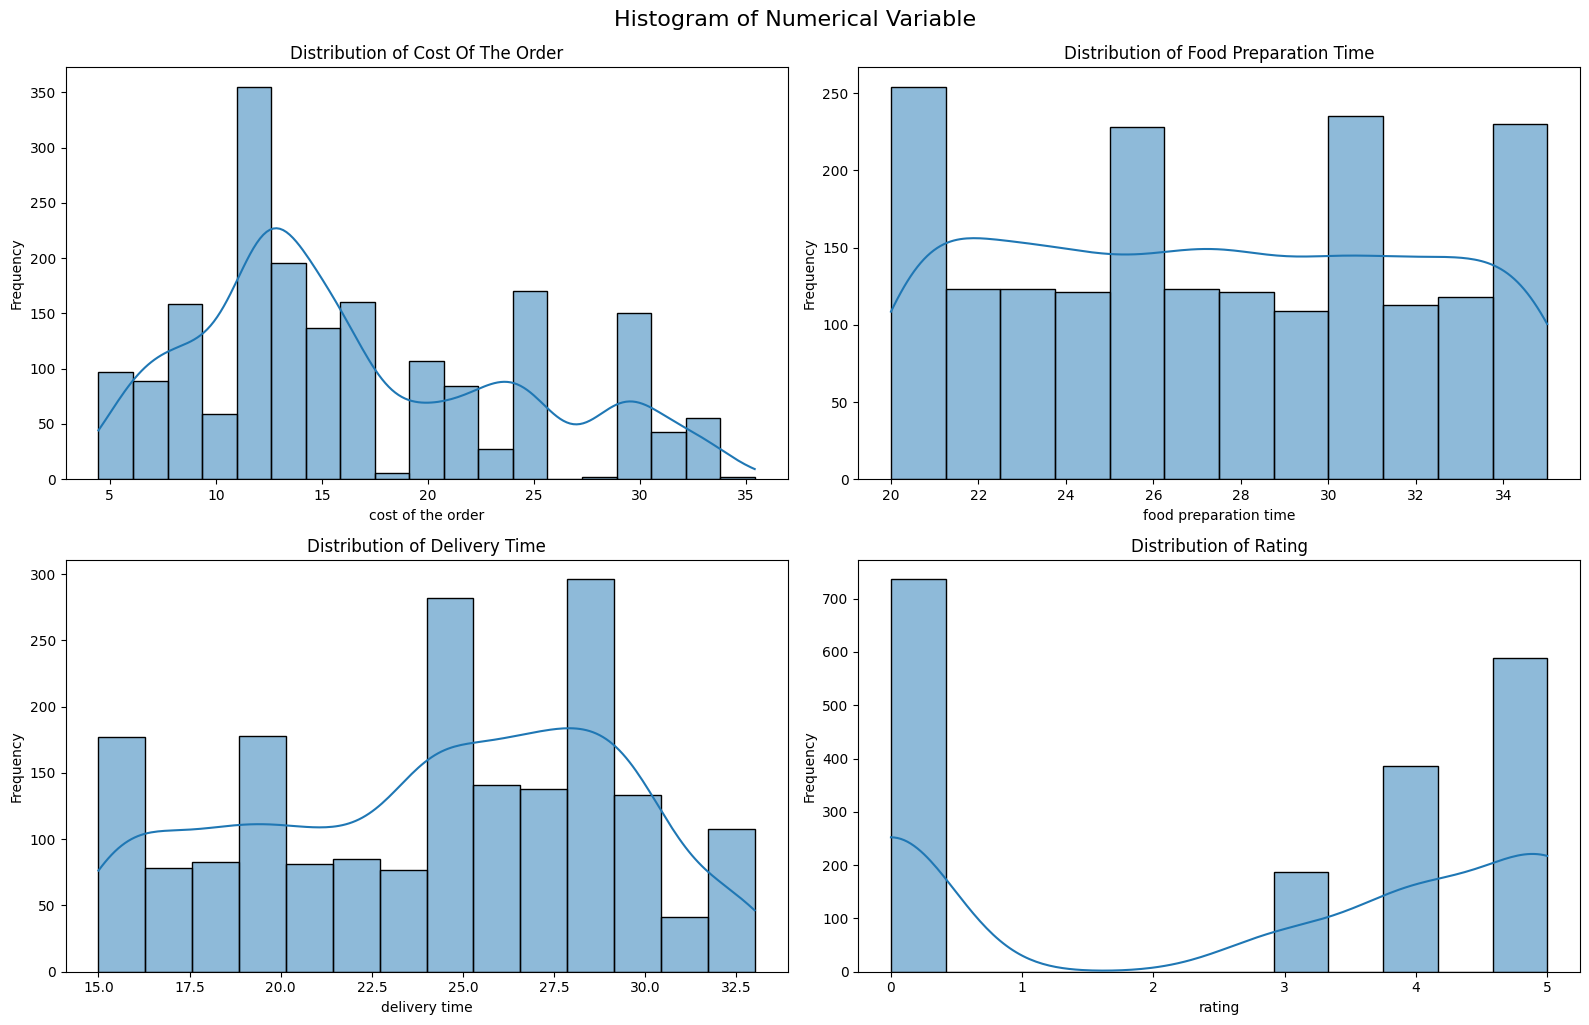

In [98]:
# I am creating histogram for all numeric variable
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']  #I have crated the list of numerical columns
plt.figure(figsize=(16,10))                      #This line will  crate new big plot with 16 inch width and 10 inch height
for i, col in enumerate(numerical_columns):      #this loop will create histogram for each numerical columns
  plt.subplot(2,2, i + 1)                        #In this line (2,2 will divide the bigger plot in 4 slots [2*2 =4]) and (i+1) tells the position of current subplot
  sns.histplot(food_data[col], kde= True)        #This line will create the histogram for current subplot and kde will create smooth desity curve on current subplot
  plt.title(f'Distribution of {col.replace("_", " ").title()}')  #This line will create the title for for subplots
  plt.xlabel(col.replace("_", " "))                              #This line will create lable for x=axis
  plt.ylabel('Frequency')                                        #This line will create lable for y=axis

plt.tight_layout()                                                          #This line will adjust all the subplots so that title and label name will not overlap and it looks more appealing.
plt.suptitle('Histogram of Numerical Variable', y = 1.02, fontsize = 16)    #This line will adjust the vertical position of suptitle
plt.savefig('histogram_of_numerical_plot.png')                              #savefig funcion will save the current figure in image format.
plt.show()                                                                  #This line will show the current figure.
plt.close()                                                                 #This line will close the current figure.


- Observation from Histogram
- **Cost of the order** : it's clearly right-skewed Data which means it has large number of low cost order and very fewer has high cost order.

- **Food Prepration time**: it appears slightly uniform within the range from (20-35 minutes) There is no strong central peak for the food prepration. Preration time is consistent.

- **Delivery Time**: Delivery distribution is somewhat symmetrical, centered around 24-25 minutes. However there are some deliveries which are taking more than usual time.

- **Rating**: Graph is heavily skewed towards 0 which are basically an unrated order. If we see rated order it shows positive trend  

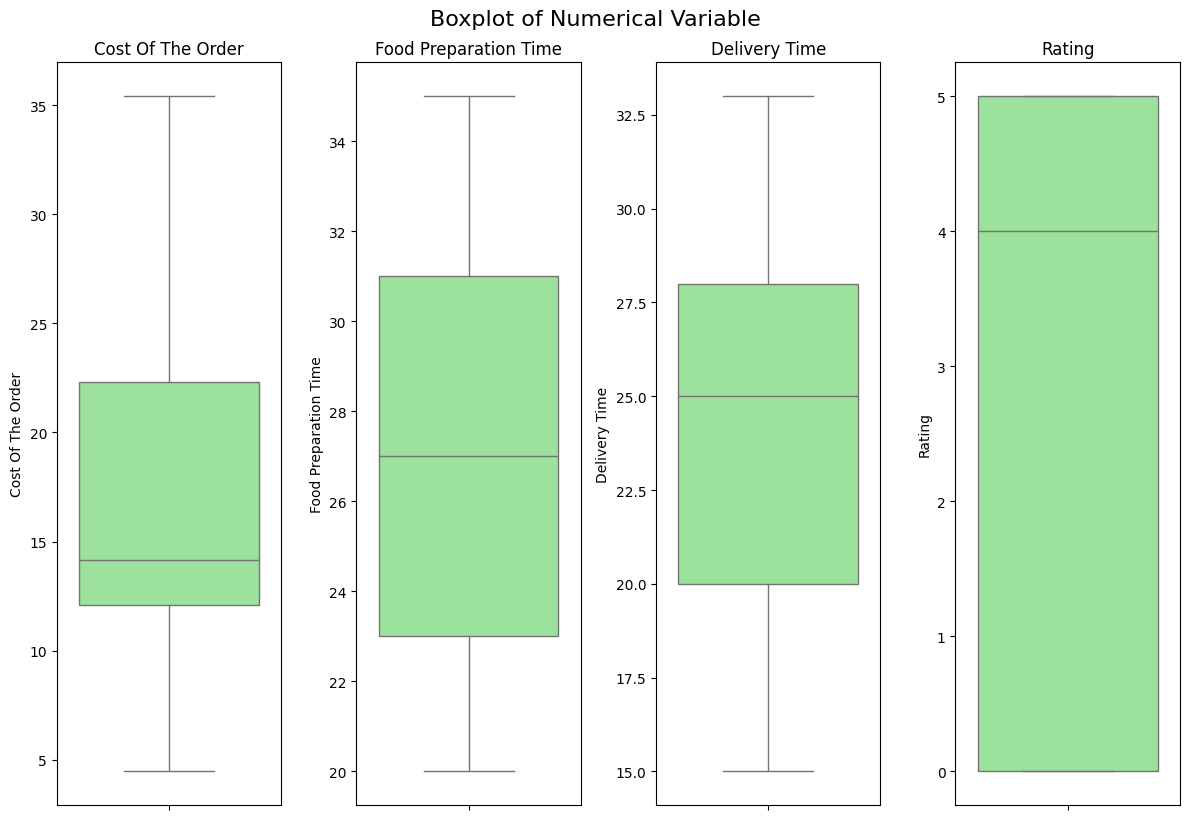

In [101]:
# I am creating boxplot for all numeric variable
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating'] #I have crated the list of numerical columns
plt.figure(figsize=(12,8))                      #This line will  create new big plot with 12 inch width and 8 inch height
for i, col in enumerate(numerical_columns):      #this loop will create boxplot for each numerical columns
  plt.subplot(1,4, i + 1)                        #In this line (1,4 will divide the bigger plot where 4 plots can fint where 1 row and 4 columns and (i+1) tells the position of current subplot
  sns.boxplot(y = food_data[col], color = 'lightgreen')        #This line will create the boxplot for current subplot with linght green color
  plt.title(f'{col.replace("_", " ").title()}')                #This line will create the title for for subplots
  plt.ylabel(col.replace("_", " ").title())                    #This line will create lable for y=axis

plt.tight_layout()                                                          #This line will adjust all the subplots so that title and label name will not overlap and it looks more appealing.
plt.suptitle('Boxplot of Numerical Variable', y = 1.02, fontsize = 16)      #This line will adjust the vertical position of suptitle
plt.savefig('boxplot_of_numerical_variable.png')                            #savefig funcion will save the current figure in image format.
plt.show()                                                                  #This line will show the current figure.
plt.close()                                                                 #This line will close the current figure.


## Observation from boxplot
- **Cost of the order** : The median is around $14 and there are outliers on the upper end  which indicates that it is right skwed.

- **Food Preparation time** : The median is around 27 and no outliers are present in this BOX which means food preparation time is approximately same.

- **Delivery time** : The median is 25, There are no outlier, which indicates that deilvery time is always predictible

- **Rating** : The median is 4. The box is highly weighted by 0 values (unrated order) which creates huge outliers at lower end.

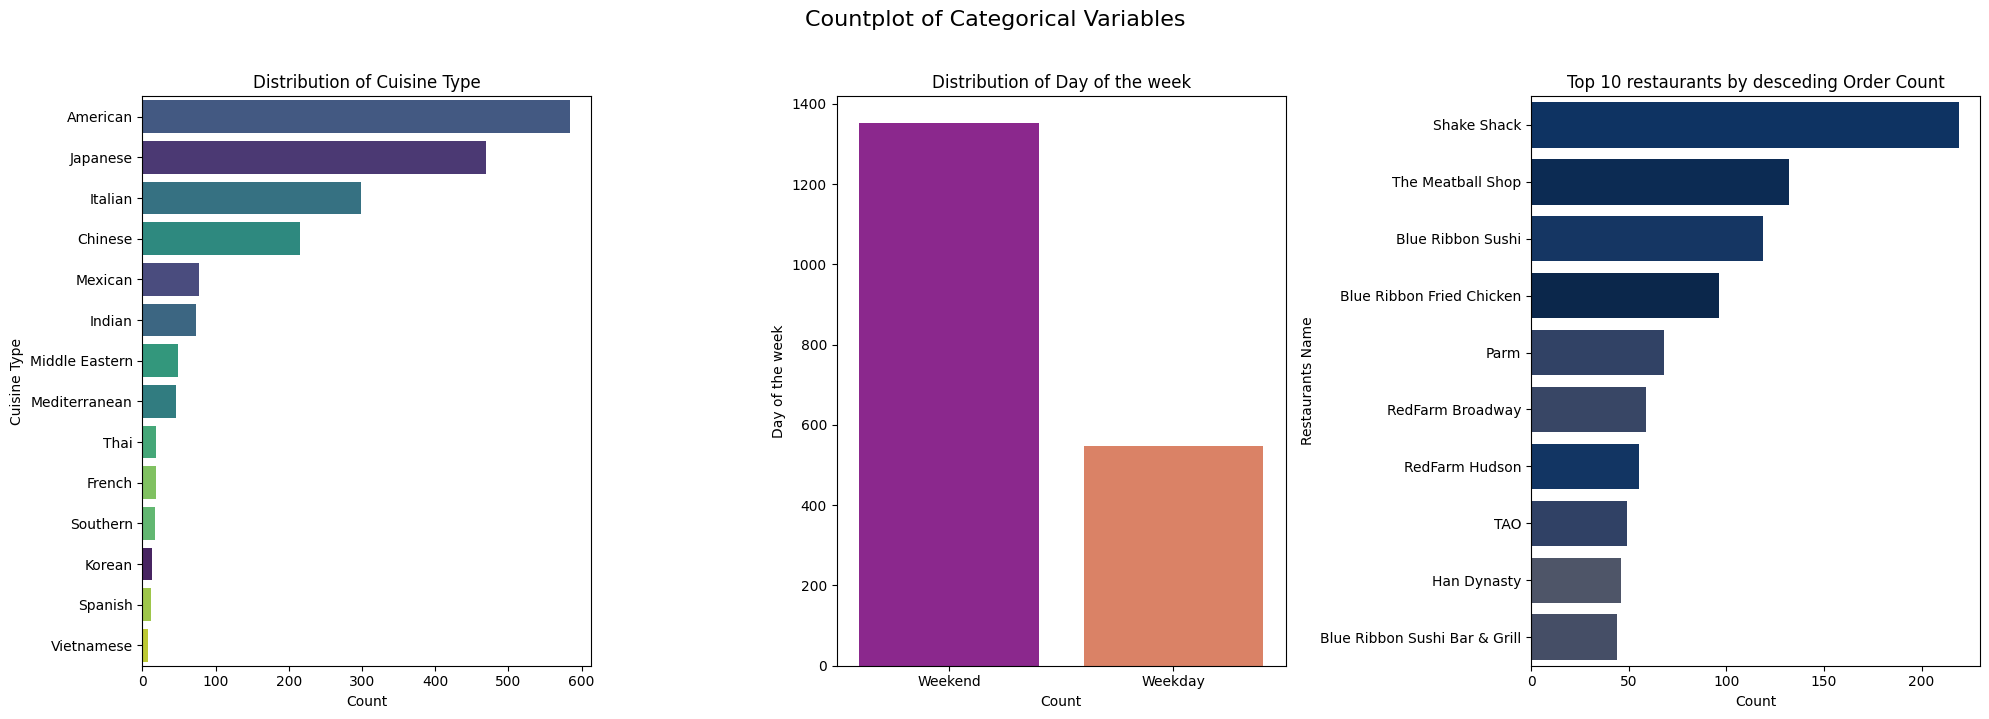

In [100]:
# I am creating plot for all categorical variables

plt.figure(figsize=(20,7))                                                       #This line will  crate new big plot with 20 inch width and 7 inch height
plt.suptitle('Countplot of Categorical Variables', y = 1.02, fontsize = 16)      #This line will adjust the vertical position of suptitle


#Creating subplot for Cuisine Type

plt.subplot(1,3, 1)                                          #In this line (1,3 will divide the bigger plot  where 1 row and 3 columns and (1) tells the position of current subplot
sns.countplot(y = food_data['cuisine_type'], order= food_data['cuisine_type'].value_counts().index, hue = food_data['cuisine_type'], legend= False, palette= 'viridis') #This line will create the countplot for current subplot, count the value and sort and indexing.
plt.title('Distribution of Cuisine Type')                     #This line will create the title for for subplots
plt.xlabel('Count')                                           #This line will create label for x=axis
plt.ylabel('Cuisine Type')                                    #This line will create label for y=axis


#Creating subplot for Day of the Week

plt.subplot(1,3, 2)                                          #This line creates the sublot at 2nd Position in bigger plot
sns.countplot(x = food_data['day_of_the_week'], order= food_data['day_of_the_week'].value_counts().index, hue = food_data['day_of_the_week'], legend= False, palette= 'plasma') #This line will create the countplot for current subplot, count the value and sort and indexing.
plt.title('Distribution of Day of the week')                  #This line will create the title for for subplots
plt.xlabel('Count')                                           #This line will create label for x=axis
plt.ylabel('Day of the week')                                 #This line will create label for y=axis



#Creating subplot for Restaurant (Top 10 for the better visualization)

plt.subplot(1, 3, 3)                                          ##This line creates the sublot at 3rd Position in bigger plot
top_restaurants = food_data['restaurant_name'].value_counts().head(10).index  #this line will count the restaurant name and show the top 10 restaurants
sns.countplot(y = food_data['restaurant_name'], order= top_restaurants, hue = food_data['restaurant_name'], palette= 'cividis') #This line will create the countplot for current subplot, count the value and sort and indexing.
plt.title('Top 10 restaurants by desceding Order Count')                   #This line will create the title for for subplots
plt.xlabel('Count')                                                        #This line will create label for x=axis
plt.ylabel('Restaurants Name')                                             #This line will create label for y=axis





plt.tight_layout()                                                          #This line will adjust all the subplots so that title and label name will not overlap and it looks more appealing.
plt.savefig('Countplot_of_Categorical_variables.png')                       #savefig funcion will save the current figure in image format.
plt.show()                                                                  #This line will show the current figure.
plt.close()                                                                 #This line will close the current figure.


## Observation from Count plot
- **Cuisine Type** : American, Japnese, Italian and chinese are the most frquent ordered which indicates that higher demand for these types of cuisines.

- **Day of the week** : There is huge difference between weekdays and weekends order which highlights that there is high demand on Weekend.


- **Restaurant Name** : Shake shack, The Meatball shop and Blue Ribbon Sushi are the most preffered restaurant as they are geting higheset number order on FoodHub Platform.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [102]:
# Top 5 resturants in terms of the number of orders received.
top_5_restaurants = food_data['restaurant_name'].value_counts().head(5)
top_5_restaurants

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
- Following are top 5 Restaurnats
1. Shake Shack with `219` orders
2. The Meatball Shop with `132` orders
3. Blue Ribbon Sushi with `119` orders
4. Blue Ribbon Fried Chicken with `96` orders
5. Parm with `68` orders

These restaurants and consistently getting great number of orders which indicates customers are preferring to order from those restaurants. Foodhub can maintain the excellent relationship with those top performing restaturant for continous growth.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [103]:
# Filter for the weekend orders
weekend_orders = food_data[food_data['day_of_the_week'] == 'Weekend']

# Find the most popular cuisine on weekends
most_popular_cuisine = weekend_orders['cuisine_type'].value_counts().idxmax()
print(f'Most Popular cuisine on weekend is {most_popular_cuisine}')

Most Popular cuisine on weekend is American


#### Observations:
- As we have found that `American cuisines` are most prefered cuisine on Weekend although which is obvious as well as Foodhub operates in New york.

- **Targated Marketing**: Foodhub can run the promotion on weekends for American cuisines.

- **Partnership with American Restaurant**: Foodhub can coordinate with more restaurants who can offers the American cuisines by showing them the trend of American cuisines on Weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [104]:
# Fetching percentage of the orders cost more than 20 dollars
percentage_more_than_20 = (food_data['cost_of_the_order'] > 20).mean() * 100
print(f'Percentage of order cost more than $20  is {percentage_more_than_20:.2f}')

Percentage of order cost more than $20  is 29.24


#### Observations:
- Around `29.24%` of all orders placed on Foodhub that is more than $20 Cost which indicates there is significant amount of customer placed large amount of order.
- This is the oppurtunity where Foodhub can run promotion to target those customers as it is benificial for the foodhub because large amount orders creates `large commission`.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [105]:
# Fetching the mean order delivery time
mean_delivery_time = food_data['delivery_time'].mean()
print(f'Mean order delivery time is {mean_delivery_time:.2f} minutes')

Mean order delivery time is 24.16 minutes


#### Observations:
- I have found on an average order takes 26.16 minutes to deliver the order from restaurant to customer. Delivery time is crucial in this business when people don't get order on time, that makes customer experience bad.

- As there are many professionals order on foodhub so they order on their lunch time which means they have limited time so delivering the order on time is very important to enhance customer experience.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
# I am finding the top 3 cutomer ID's and their number of place order who has the highest order placed
top_3_customers = food_data['customer_id'].value_counts().head(3)
print(' Top 3 Customer and their number of order placed')
print(top_3_customers)


 Top 3 Customer and their number of order placed
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
-  Top 3 Customer and their number of order placed
1. Customer ID: 52832 has placed 13 orders
2. Customer ID: 47440 has placed 10 orders
3. Customer ID: 832887 has placed 9 orders

Finding those top customer is crucial for the Foodhub customer retention and loyalty program. These customer shows the highest engagement with platform so offering discount to such customer will encourage them to place more order and keep them engnaged with Foodhub Platform. Eventually it leads to enhance the customer satisfaction.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


-  Multivarient analysis  involve three or variable simultenously. This helps uncover the pattern which might not visible when we see individual variables.
- Let's start Multivarient analysis


1. Exploring relationship in Numerical variables Vs Numerical variable


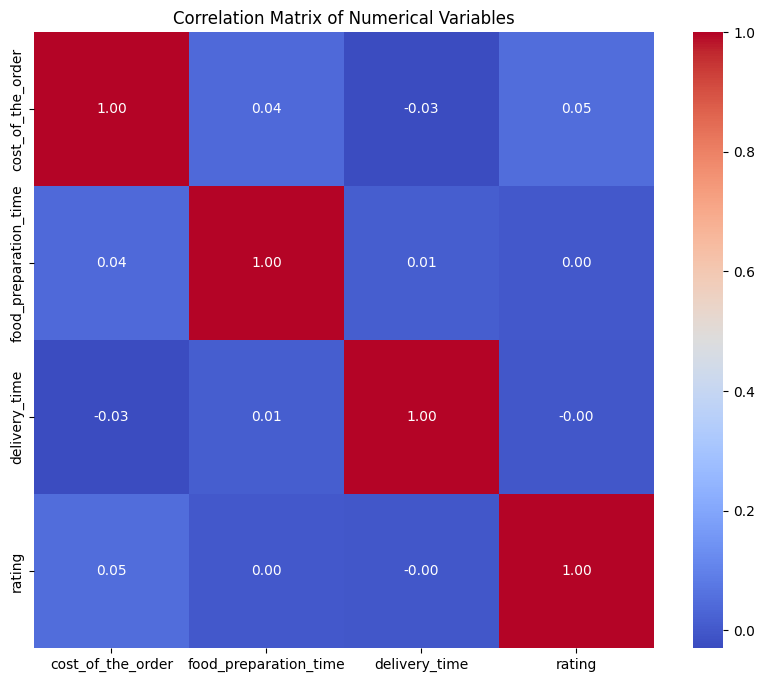

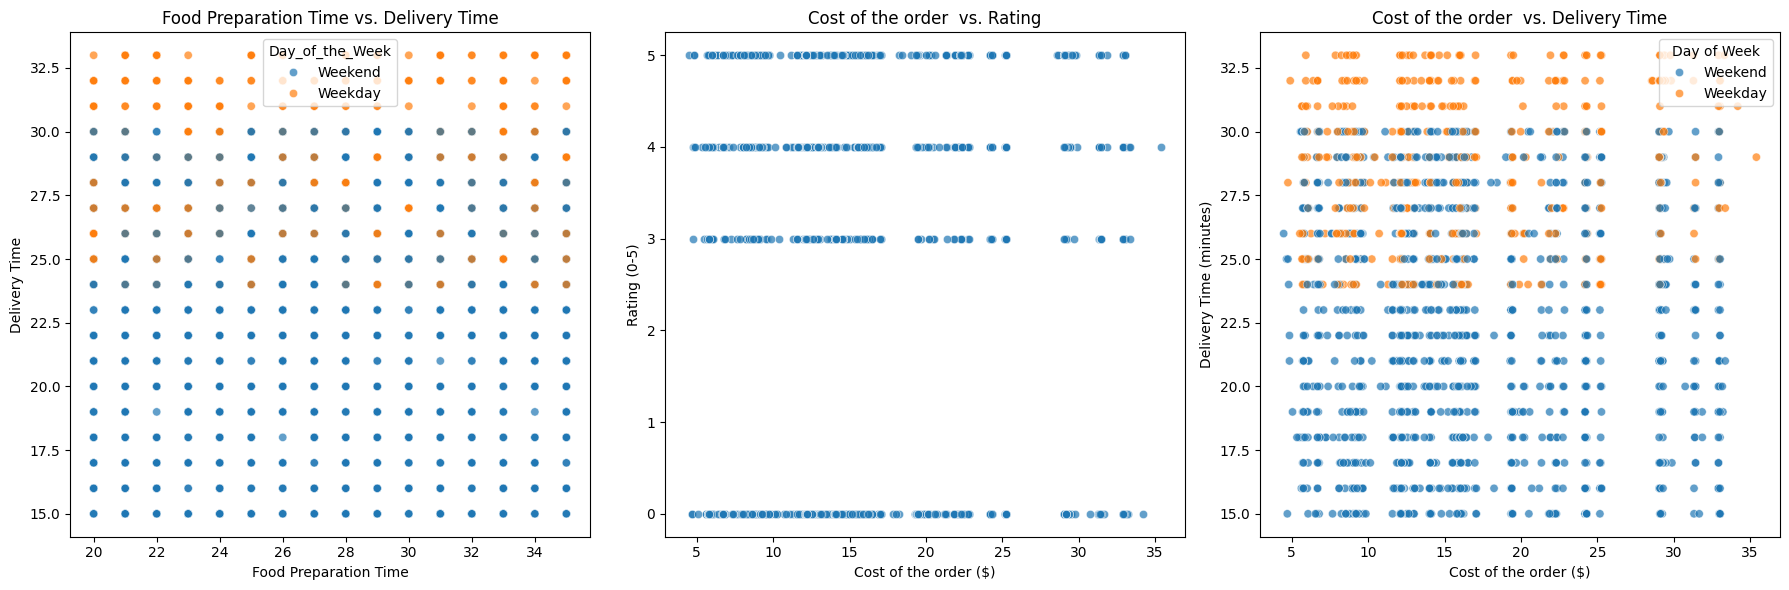


2. Exploring relationship in Numerical Vs Categorical relationship


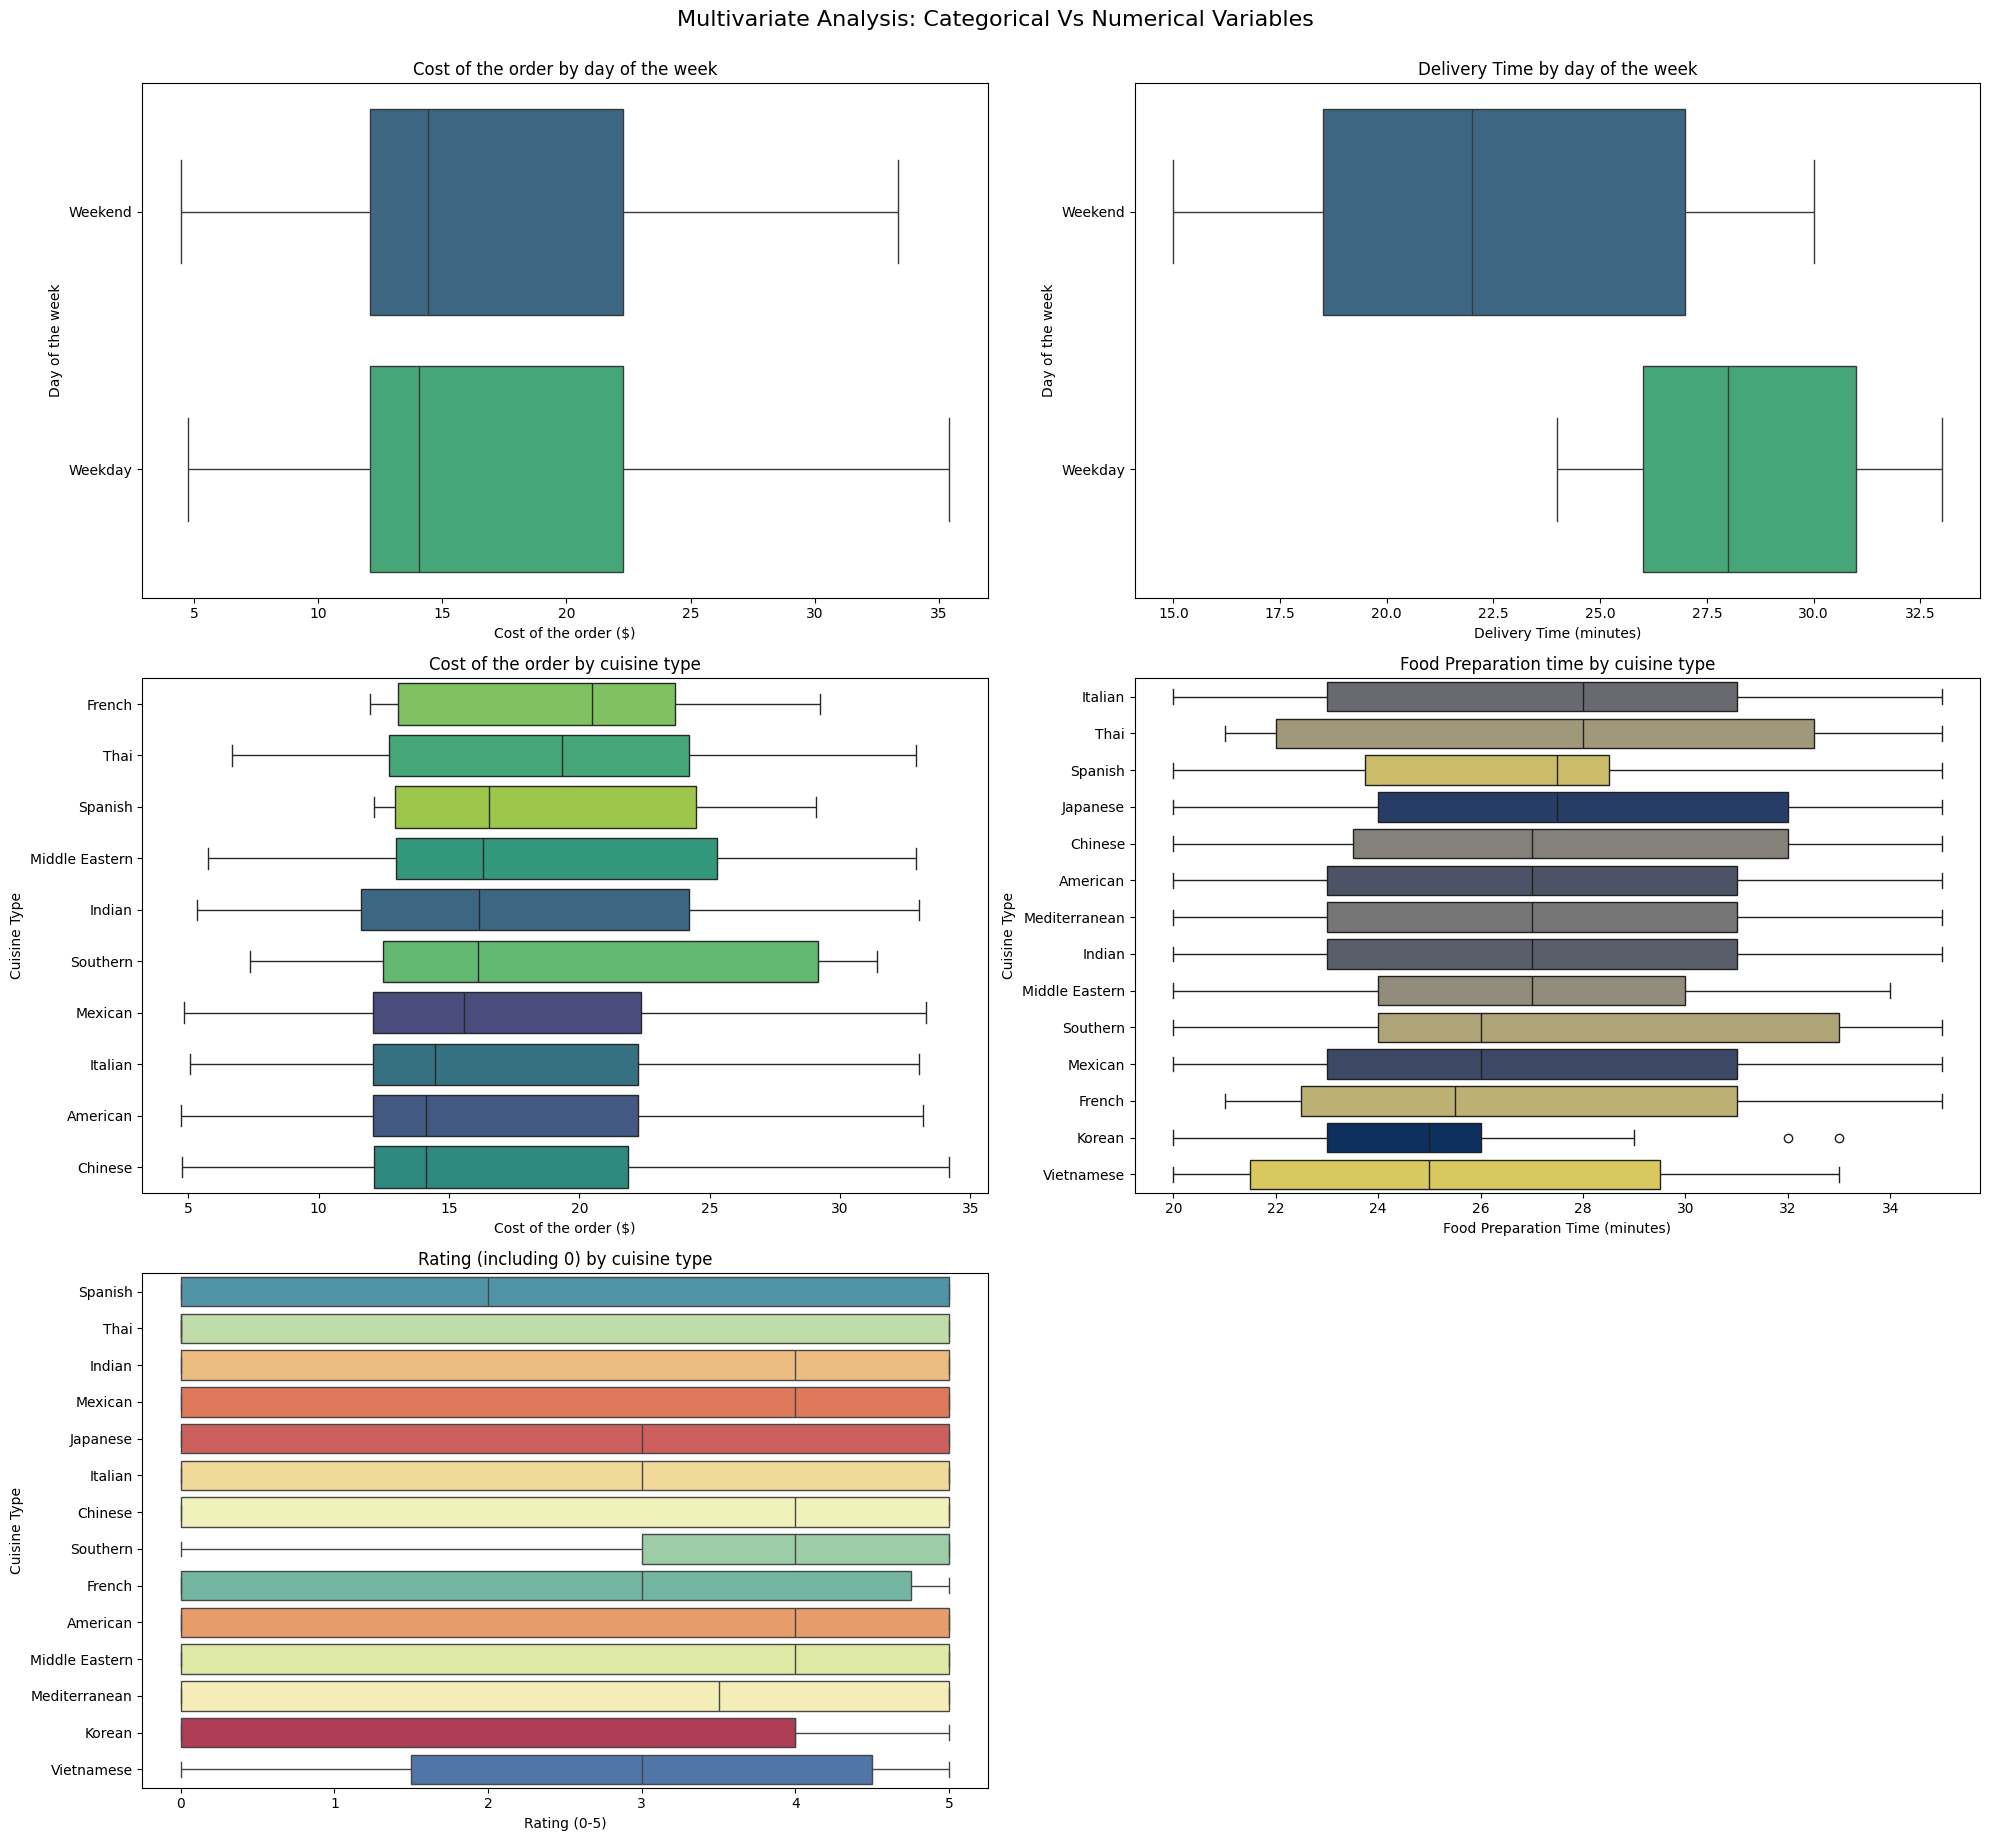


3. Exploring Categorical vs. Categorical Relationships:


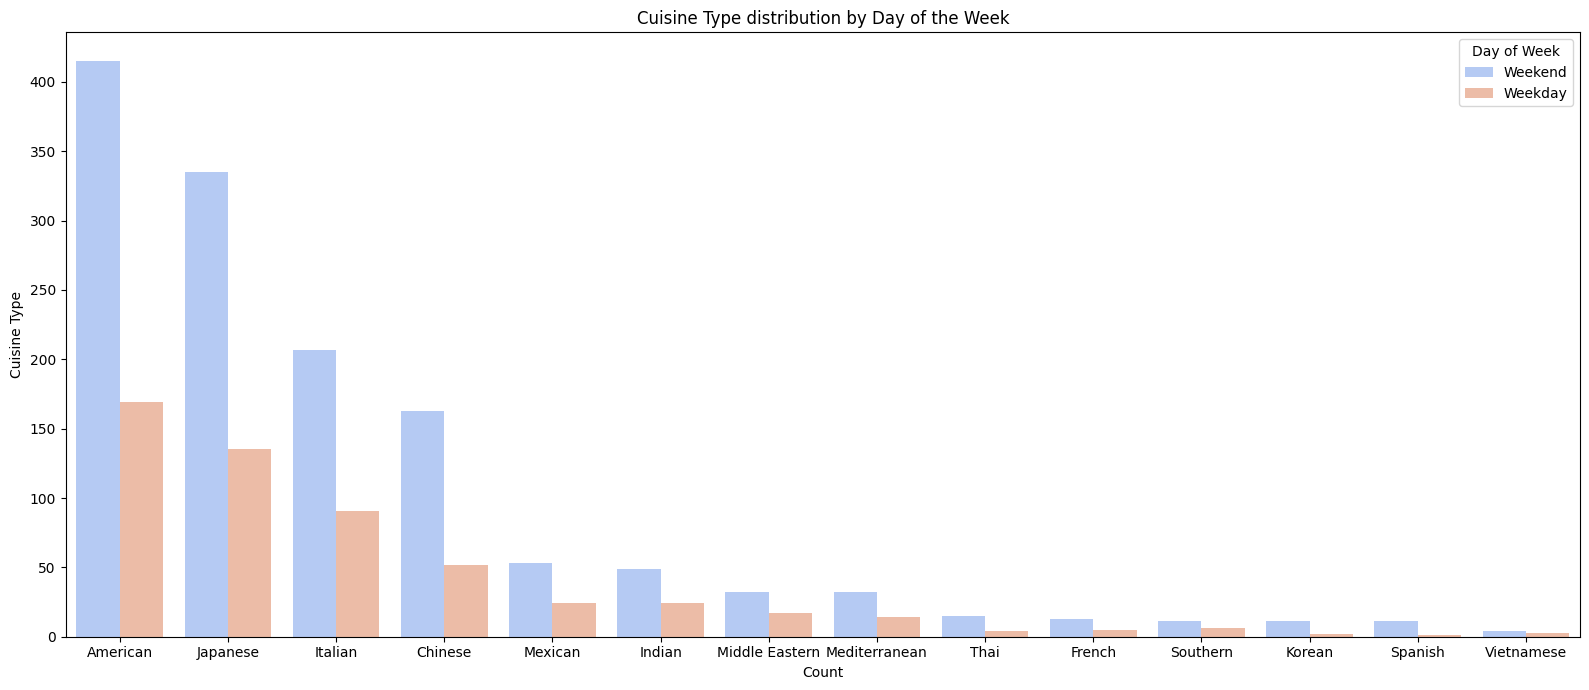

In [56]:
# ****** 1. Numerical variables Vs Numerical variable relationship  *************

print('\n1. Exploring relationship in Numerical variables Vs Numerical variable')

#correlation matrix
plt.figure(figsize=(10,8))                                                                           #This line will  crate new big plot with 10 inch width and 8 inch height
#I have excluded the customer_id and order_id as they does not provide any meaningful information
numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']        #Created the list for numerical columns excluding ordre_id and customer_id
sns.heatmap(food_data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')             #Created a correlation matrix plot with annot argument which actually shows the value along with color
plt.title('Correlation Matrix of Numerical Variables')                                               #This line crates a title for this plot
plt.savefig('correlation_matrix.png')                                                                #savefig funcion will save the current figure in image format.
plt.show()                                                                                           #This line will show the current figure.
plt.close()                                                                                          #This line will close the current figure.



#Scatter plot for the key relationship

plt.figure(figsize=(18,6))                                                                           #This line will  crate new big plot with 18 inch width and 6 inch height
plt.subplot(1,3, 1)                                                                                 #In this line (1,3 will divide the bigger plot  where 1 row and 3 columns and (1) tells the position of current
sns.scatterplot(x= 'food_preparation_time', y= 'delivery_time', data= food_data, hue= 'day_of_the_week', alpha = 0.7)  #this will create scatter plot in Food Preparation Time vs. Delivery Time
plt.title('Food Preparation Time vs. Delivery Time')                                                  # This line will create the title for this subplot
plt.xlabel('Food Preparation Time')                                                                   # This line will create label for x=axis
plt.ylabel('Delivery Time')                                                                           # This line will create label for y=axis
plt.legend(title = 'Day_of_the_Week')                                                                 # This crates the legend name in subplot




plt.subplot(1,3, 2)                                                                                   #This line creates the sublot at 2nd position in bigger plot
sns.scatterplot(x= 'cost_of_the_order', y= 'rating', data= food_data, alpha = 0.7)                    #this will create scatter plot between cost of the order and rating
plt.title('Cost of the order  vs. Rating')                                                            # This line will create the title for this subplot
plt.xlabel('Cost of the order ($)')                                                                   # This line will create label for x=axis
plt.ylabel('Rating (0-5)')                                                                            # This line will create label for y=axis



plt.subplot(1,3, 3)                                                                                   #This line creates the sublot at 3rd position in bigger plot
sns.scatterplot(x= 'cost_of_the_order', y= 'delivery_time', data= food_data, hue= 'day_of_the_week', alpha = 0.7) #this will create scatter plot between cost of the order and delivery time
plt.title('Cost of the order  vs. Delivery Time')                                                     # This line will create the title for this subplot
plt.xlabel('Cost of the order ($)')                                                                   # This line will create label for x=axis
plt.ylabel('Delivery Time (minutes)')                                                                 # This line will create label for y=axis
plt.legend(title = 'Day of Week')                                                                     # This crates the legend name in subplot


plt.tight_layout()                                                                                   #This line will adjust all the subplots so that title and label name will not overlap and it looks more appealing.
plt.savefig('Numerical_Scatter_Plots.png')                                                           #savefig funcion will save the current figure in image format.
plt.show()                                                                                           #This line will show the current figure.
plt.close()                                                                                          #This line will close the current figure.


# ****** 2. Numerical Vs Categorical relationship  *************
print('\n2. Exploring relationship in Numerical Vs Categorical relationship')

plt.figure(figsize=(20,18))                                                                         #This line will  crate new big plot with 20 inch width and 18 inch height
#creating subplot for Cost of the order by day of the week

plt.subplot(3,2, 1)                                                                                 #In this line (3,2 will divide the bigger plot  where 3 row and 2 columns and (1) tells the position of current subplot
sns.boxplot(x = 'cost_of_the_order', y = 'day_of_the_week', data= food_data, hue = food_data['day_of_the_week'], legend= False, palette= 'viridis')    #This line will create a boxplot
plt.title('Cost of the order by day of the week')                                                   #This line will create the title for for subplots
plt.xlabel('Cost of the order ($)')                                                                 #This line will create label for x=axis
plt.ylabel('Day of the week')


#creating subplot for Delivery Time by day of the week

plt.subplot(3,2, 2)                                                                                 #This line creates the sublot at 2nd position in bigger plot
sns.boxplot(x = 'delivery_time', y = 'day_of_the_week', data= food_data, hue = food_data['day_of_the_week'], legend= False, palette= 'viridis')        #This line will create a boxplot
plt.title('Delivery Time by day of the week')                                                       #This line will create the title for for subplots
plt.xlabel('Delivery Time (minutes)')                                                               #This line will create label for x=axis
plt.ylabel('Day of the week')



#creating subplot for Cost of the order by cusine type (Top 10 for the clarity because in dataset there are many types of cuisine )
#order by median cost for better comparison
top_cuisines = (food_data.groupby('cuisine_type')['cost_of_the_order'].median().sort_values(ascending= False).head(10)).index

plt.subplot(3,2, 3)                                                                                  #This line creates the sublot at 3rd position in bigger plot
sns.boxplot(x = 'cost_of_the_order', y = 'cuisine_type', data= food_data, order= top_cuisines, hue = food_data['cuisine_type'], legend= False, palette= 'viridis') #This line will create a boxplot
plt.title('Cost of the order by cuisine type')                                                      #This line will create the title for for subplots
plt.xlabel('Cost of the order ($)')                                                                 #This line will create label for x=axis
plt.ylabel('Cuisine Type')                                                                          #This line will create label for y=axis



#Food Preparation time by couisines type
#filter the food prepration time as per the median
cusines_prepration_time = (food_data.groupby('cuisine_type')['food_preparation_time'].median().sort_values(ascending= False)).index

plt.subplot(3,2, 4)                                                                                 #This line creates the sublot at 4th position in bigger plot
sns.boxplot(x = 'food_preparation_time', y = 'cuisine_type', data= food_data, order= cusines_prepration_time, hue = food_data['cuisine_type'], legend= False, palette= 'cividis') #This line will create a boxplot
plt.title('Food Preparation time by cuisine type')                                                  #This line will crate the title
plt.xlabel('Food Preparation Time (minutes)')                                                       #This line will create label for x=axis
plt.ylabel('Cuisine Type')                                                                          #This line will create label for y=axis


# Rating by Cuisine Type
"""
I have excluded 0 ratings for average calculation, as it is not the actual rating
I have deliberately filled 0 in missing values for the analysis but I have included those in plot visualization
"""
actual_rating = food_data[food_data['rating'] > 0]
cuisine_order_rating = (actual_rating.groupby('cuisine_type')['rating'].mean().sort_values(ascending= False)).index

plt.subplot(3,2, 5)                                                                                   #This line creates the sublot at 5th position in bigger plot
sns.boxplot(x = 'rating', y = 'cuisine_type', data= food_data, order= cuisine_order_rating, hue = food_data['cuisine_type'], legend= False, palette= 'Spectral') #This line will create a boxplot
plt.title('Rating (including 0) by cuisine type')                                                     #This line will create the title for for subplots
plt.xlabel('Rating (0-5)')                                                                            #This line will create label for x=axis
plt.ylabel('Cuisine Type')                                                                            #This line will create label for y=axis


plt.tight_layout()                                                                                   #This line will adjust all the subplots so that title and label name will not overlap and it looks more appealing.
plt.suptitle('Multivariate Analysis: Categorical Vs Numerical Variables', y = 1.02, fontsize = 16)   #This line will adjust the vertical position of suptitle
plt.savefig('Categorical_Scatter_Plots.png')                                                         #savefig funcion will save the current figure in image format.
plt.show()                                                                                           #This line will show the current figure.
plt.close()                                                                                          #This line will close the current figure.


# --- 3. Categorical Data vs. Categorical Data Relationships ---
print("\n3. Exploring Categorical vs. Categorical Relationships:")

plt.figure(figsize=(16,7))                                                                           #This line will  crate new big plot with 16 inch width and 7 inch height
#creating subplot for Cuisine Type distribution by day of the week
sns.countplot(x = 'cuisine_type', hue = 'day_of_the_week', data= food_data, order=food_data['cuisine_type'].value_counts().index, palette= 'coolwarm')  #This line will create a countplot
plt.title('Cuisine Type distribution by Day of the Week')                                            #This line will crate the title
plt.xlabel('Count')                                                                                  #This line will create label for x=axis
plt.ylabel('Cuisine Type')                                                                           #This line will create label for y=axis
plt.legend(title = 'Day of Week')                                                                    # This line will create legend
plt.tight_layout()                                                                                   #This line will adjust all the plot so that title and label name will not overlap and it looks more appealing.
plt.savefig('Categorical_Countplot_multivariate_analysis.png')                                       #savefig funcion will save the current figure in image format.
plt.show()                                                                                           #This line will show the current figure.
plt.close()                                                                                          #This line will close the current figure.



### Observation :
 --------  **Numerical Vs. Numerical  Relationship**  ------------
- It looks very week positive relationship between delivery time and food preparation time `(correlation coefficient of 0.01)` which indicates there is not much impact on delivery time because of food prepration time.

- Cost of the order is `showing very weak or even negligible relationship` with Rating, Food prepration time and Delivery time which means price of order does not influence to customer rating, food prepration time and delivery time.

- Rating has `weak negative correlation` with food prepration time, delivery time and cost of order but these are very close to zero

----------    **Scatter plots**    ----------

- **Food Prepration time Vs. Delivery Time** : Scatter plots shows `wide spread of pionts` which means there is no directly relationship between food prepration time and delivery time. Dellivery time are not stable regardless of the food prepration time.

- **Cost of the order Vs. Rating** : There is no pattern showing between cost of the order and rating. it indicates that no matter what the cost of food is rating can be give to all order regardless of small or big amount of order.

- **Cost of the order Vs Delivery Time** : There is no relationship between cost of the order and delivery time which means delivery time are consistence with both small or big amount of order.



----------    **Numerical Vs. Categorical Relationship (Box Plots)**    ----------

- **Cost of the order by the Day of the Week**:  cost of the order median for Weekend looks higher as compared to weekdays. Weekend order shows wider IQR and more outliers which indicates that there are greater variablility spending on weekends.

- **Delivery Time by the Day of the Week**: Delivery time is showing lower delivery time on weekends (around 22-23 minutes) compared to weekdays (28-29 minutes). It may logistinc are getting better resources on weekends or perhaps due to lower traffic on weekends.

- **Cost of the order by Cuisine Type**: Some cuisines like French, Thai Spanish and Middle Eastern has higher median cost of the order compare to others. Popular cuisines like American and French have broader price.


- **Food Preparation by Cuisine Type**: Most of the cuisines types showing the similar pattern in food preparation median time (25-30 minutes). There is no order shows lower or higher preparation time.

- **Rating by Cuisine Type**: When we see only rated rating (Excluding 0) it shows that italian and japanese slightly have higher and average rating compared to other cuisines. The large number of unrated order are effecting overall mean for many cuisines.


----------    **Categorical Vs. Categorical Relationship**    ----------

- **Cuisine Type distribution day of the week**: It has been observed that American and Japanese cuisines have highest number of order on both weekdays and weekend.  Although all types of cusines are ordered weekend however American and Japanese cuisines has playing great role in number of orders.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [106]:
#Filter out the order which are not rates as those are not actual rating
actual_rating = food_data[food_data['rating'] > 0]

# Filter the restaurant_name and calculate the mean and count by using agg function for rating.
restaurant_ratings = actual_rating.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()
restaurant_ratings.rename(columns={'count': 'rating_count', 'mean': 'average_rating'}, inplace=True)

# Fetch the restaurants which are fulfilling the criteria: rating_count > 50 AND average_rating > 4
eligible_restaurants = restaurant_ratings[(restaurant_ratings['rating_count'] > 50) & (restaurant_ratings['average_rating'] > 4)].copy()

#Set the rating value  with 2 decimal places
eligible_restaurants['average_rating'] = eligible_restaurants['average_rating'].round(2)

print("Eligible Restaurants which are meeting the criteria for the promotional offer:")
print(eligible_restaurants)

Eligible Restaurants which are meeting the criteria for the promotional offer:
               restaurant_name  rating_count  average_rating
16   Blue Ribbon Fried Chicken            64            4.33
17           Blue Ribbon Sushi            73            4.22
117                Shake Shack           133            4.28
132          The Meatball Shop            84            4.51


#### Observations:
- We have found following restaurants who are meeting the criteria for the promotional offer:
1. Blue Ribbon Fried Chicken has  `64` rating with an average rating : `4.33`
2. Blue Ribbon Sushi has `73` rating with an average rating : `4.22`
3. Shake Shack has `133` rating with an average rating : `4.28`
4. The Meatball Shop has `84` rating with an average rating : `4.51`

- These four restaurants are continously getting more than 50 rating along with more than 4 average rating. Foodhub can showcase such restaturn on its platform and get the attention of new customer along with enhancement of customer experience of existing customer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [108]:
#define a function to calculate surcharges
def calculate_surcharges(cost):
  if cost > 20:
    return cost * 0.25
  elif cost > 5:
    return cost * 0.15
  else:
    return 0

#Creating the new column 'Surcharges' and apply the function on it
food_data['Sucharges'] = food_data['cost_of_the_order'].apply(calculate_surcharges)

#summing the total revenue of FoodHub
total_surcharges = food_data['Sucharges'].sum()
print(f'Total Revenue of FoodHub is: ${total_surcharges: .2f}')



Total Revenue of FoodHub is: $ 6166.30


#### Observations:
- After applying the tiered suchrages I have found FoodHub earning is over `$6000` This matric is very important to measure the company financial performance, profitability and good for making strategy for pricing modal and business expension. Tiered commision strategy is great way to earn more as it provides big amount on big orders.  

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [109]:
# finding the total order time for all the orders
total_order_time = food_data['food_preparation_time'] + food_data['delivery_time']

# fetching the orders who took more than 60 minutes to delivery since the order placed
orders_more_than_60_minutes = food_data[food_data['food_preparation_time'] + food_data['delivery_time'] > 60]

# Calculating the percentage of orders which took more than 60 minutes
percentage_more_than_60 = (len(orders_more_than_60_minutes) / len(food_data)) * 100
print(f'Orders percentage which took more than 60 minutes : {percentage_more_than_60: .2f}')

Orders percentage which took more than 60 minutes :  10.54


#### Observations:
- We can see that `Orders percentage which took more than 60 minutes :  10.54` which mean out of 10 order every 1 order is taking more that 60 minutes which is the oppurtunity FoodHub need work on.

- As this is significant percentage of late orders which leads to customer dissatisfaction.  Foodhub needs to investigate if the problem is with restaurant end (Food prepration time ) or with logistic operations.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [110]:
# finding the mean of delivery time of orders for weekdays and weekends
mean_delivery_time_weekdays  = food_data[food_data['day_of_the_week'] != 'Weekend']['delivery_time'].mean()
mean_delivery_time_weekends  = food_data[food_data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print(f'Mean delivery time for weekdays is {mean_delivery_time_weekdays: .2f}')
print(f'Mean delivery time for weekends is {mean_delivery_time_weekends: .2f}')


Mean delivery time for weekdays is  28.34
Mean delivery time for weekends is  22.47


#### Observations:
- Mean delivery time for weekdays is  `28.34` minutes
- Mean delivery time for weekends is  `22.47` minutes

It has been observed that there is a gap of 6 minutes in delivery time between weekdays and weekend where Foodhub can work. As if the order can deliver faster for about 6 compared on weekdays so there may be some strategy Foodhub can apply on logistic operation to make the delivery faster. This will enhance the customer experience eventually.  



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Based on analysis of FoodHub Data, I have found the following points:
1. **Lack of getting ratings** ✈ Many customers are not giving feedback about the order they recieve which is `around 39%`. This means we are loosing valueable feedback about our service and restaurant.

2. **Food Preparation is consistence** ✈ Restaurants takes `around 27 minutes` to prepare the food consistently so this is something on which we can rely.

3. **Deliveries are faster on weekends** ✈  Delivery time on weekeds are quicker`(On an average 22 mintues)` compared to weekdays `(On an average 28 minutes)`, this could be due to lower traffics or availibility of delivery staff.

4. **Super Start Restaurants** ✈ We have many great Restaurants such as `Shake shack`, `The Meatball Shop`, `Blue Ribbon Sushi`, `Blue Ribbon Fried Chicken` who are getting excellent rating consistently (4 out of 5). It shows how customer are liking these restaurants.

5. **Most Preferred Cuisines** ✈ `Japanese and American cuisines are special hit` on weekends as it ordered by most of the customers on weekends.

6. **High value order** ✈ It has been found that 30% of orders is greater than $20 which indicates that `big chunk of customer are willing to spend more` on orders.


7. **Longer Delivery Time order** ✈ We have found 10% of all the orders which means `out of 10 order every 1 order is taking more that 60 minutes` which would definately would be bad experience for the customer.

8. **Earning via commission** ✈ Foodhub `earns good amount of money from the restarurants` via commision specially on high value ordered. We ahve found it was over $6000




### Recommendations:

*  Based on the analysis I can suggest some practical action to enhance the customer experience and business operation.

1. **Getting More Feedback** ✈ Implement a gentle reminder on the food app which pops up on the customer device shortly after deliver the food. Also offer small rewards on giving rating. Reward like getting 5% off voucher on next order.

- `Why`: When we get more rating then it would be easy to identify what's working and which is the area where we need to work on either from restaurant end or from logistic operation. This helps us to ensure consistent quality and identify the problem before it gets become big.   

2. **Highlighting the top performer restaurants** ✈  Features star performer restaurnts `Shake shack`, `The Meatball Shop`, `Blue Ribbon Sushi`, `Blue Ribbon Fried Chicken` on your marketing campaign.

- Also FoodHub can create seperate section on App which says `Top Rated Restaurants` or `Customer Favourate` or seperate section for those specific restaurants

- `Why`: This Strategy help  us to attract new customer and encourage existing customer to order food from Top Rated. Featuring Top Rated Restaurnt on the App will actually create the brand reputation for Foodhub.

3. **Investigate the Weekdays delivery** ✈ As we have found delivery time is slower aroub 6 minutes compared to weekends so FoodHub need to evaluate if it is happening due to traffic, or there is something can do with route or evaluating the delivery partners.

- `Why`: Speed up the delivery time will enhance the customer service and avoid the churn which may switch to the compititor because of slow delivery.



4. **Marketing Strategy for weekend cuisines** ✈ Run the promotion on high demand cuisines like American anad Japanese on weekend. Foodhub can partner new restaurants who can provide quality American and Japanese food.

- `Why`: By doing this Foodhub order pattern will align with existing demand of weekends along with along with maximizing the order potential on weekends.


5. **Addressing Long time delivery orders** ✈ Identify those orders seriously which are taking more than 60 minutes. Communicate with customer for the delay in order. Offer some apology credits.
- Analyse the cause of long duration order, if that is happenning because of particular restaurants, complex order or traffic.
- `Why` Stopping those long duration order is crusial to avoid churn and enhance customer experience.

